In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\User\Downloads\ICC Men's T20 World Cup 2024 Matches\matches.csv")
print(df)

    Match_number            Team_1        Team_2 Date_of_match  \
0              1            Canada           USA    02-06-2024   
1              2  Papua New Guinea   West Indies    02-06-2024   
2              3              Oman       Namibia    03-06-2024   
3              4         Sri Lanka  South Africa    03-06-2024   
4              5       Afghanistan        Uganda    04-06-2024   
5              6          Scotland       England    05-06-2024   
6              7             Nepal   Netherlands    05-06-2024   
7              8           Ireland         India    05-06-2024   
8              9  Papua New Guinea        Uganda    06-06-2024   
9             10         Australia          Oman    06-06-2024   
10            11          Pakistan           USA    07-06-2024   
11            12           Namibia      Scotland    07-06-2024   
12            13            Canada       Ireland    07-06-2024   
13            14       Afghanistan   New Zealand    08-06-2024   
14        

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Match_number      55 non-null     int64  
 1   Team_1            55 non-null     object 
 2   Team_2            55 non-null     object 
 3   Date_of_match     55 non-null     object 
 4   Venue_stadium     55 non-null     object 
 5   Venue_city        55 non-null     object 
 6   Toss_winner       52 non-null     object 
 7   Toss_decision     52 non-null     object 
 8   Match_result      55 non-null     object 
 9   Winning_team      51 non-null     object 
 10  Man_of_match      51 non-null     object 
 11  Win_by_runs       27 non-null     float64
 12  Win_by_wickets    24 non-null     float64
 13  Match_type        55 non-null     object 
 14  Super_over_match  55 non-null     object 
dtypes: float64(2), int64(1), object(12)
memory usage: 6.6+ KB


In [75]:
df.columns.tolist()

['Match_number',
 'Team_1',
 'Team_2',
 'Date_of_match',
 'Venue_stadium',
 'Venue_city',
 'Toss_winner',
 'Toss_decision',
 'Match_result',
 'Winning_team',
 'Man_of_match',
 'Win_by_runs',
 'Win_by_wickets',
 'Match_type',
 'Super_over_match']

In [76]:
df.duplicated().sum()

0

In [77]:
missing_values = df.isnull().sum()
total_missing_values = df.isnull().sum().sum()
print(f"Missing Values: \n{missing_values}")
print(f"Total missing Values = {total_missing_values}")

Missing Values: 
Match_number         0
Team_1               0
Team_2               0
Date_of_match        0
Venue_stadium        0
Venue_city           0
Toss_winner          3
Toss_decision        3
Match_result         0
Winning_team         4
Man_of_match         4
Win_by_runs         28
Win_by_wickets      31
Match_type           0
Super_over_match     0
dtype: int64
Total missing Values = 73


In [78]:
# Convert Date_of_match to datetime format
df['Date_of_match'] = pd.to_datetime(df['Date_of_match'], format='%d-%m-%Y')

# Create a new column combining Win_by_runs and Win_by_wickets
df['Win_result'] = df['Win_by_runs'].fillna(df['Win_by_wickets'])
df['Win_result'] = df['Win_result'].fillna(0).astype('int64')

# Create a new column to indicate the method of victory and the margin
df['Win_method'] = 'Unknown'  # Initialize with default label
df.loc[df['Win_by_runs'].notna(), 'Win_method'] = 'Runs'
df.loc[df['Win_by_wickets'].notna(), 'Win_method'] = 'Wickets'

# Explicitly convert categorical columns to string/object type and fill NaN values
str_columns = ['Toss_winner', 'Toss_decision', 'Winning_team', 'Man_of_match']
df[str_columns] = df[str_columns].fillna('Unknown').astype(str)
df.loc[df['Win_by_wickets'].notna(), 'Win_method'] = 'Wickets'

# Assuming df is already loaded or read from the CSV file
df['Win_by_runs'] = df['Win_by_runs'].fillna(0).astype(int)
df['Win_by_wickets'] = df['Win_by_wickets'].fillna(0).astype(int)

print(df.head())

   Match_number            Team_1        Team_2 Date_of_match  \
0             1            Canada           USA    2024-06-02   
1             2  Papua New Guinea   West Indies    2024-06-02   
2             3              Oman       Namibia    2024-06-03   
3             4         Sri Lanka  South Africa    2024-06-03   
4             5       Afghanistan        Uganda    2024-06-04   

                                 Venue_stadium  Venue_city  Toss_winner  \
0                        Grand Prairie Stadium      Dallas          USA   
1                           Providence Stadium  Providence  West Indies   
2                              Kensington Oval  Bridgetown      Namibia   
3  Nassau County International Cricket Stadium    New York    Sri Lanka   
4                           Providence Stadium  Providence       Uganda   

  Toss_decision Match_result  Winning_team      Man_of_match  Win_by_runs  \
0          bowl       Played           USA       Aaron Jones            0   
1   

In [79]:
missing_values = df.isnull().sum()
total_missing_values = df.isnull().sum().sum()
print(f"Missing Values: \n{missing_values}")
print(f"\nTotal missing Values = {total_missing_values}\n")

Missing Values: 
Match_number        0
Team_1              0
Team_2              0
Date_of_match       0
Venue_stadium       0
Venue_city          0
Toss_winner         0
Toss_decision       0
Match_result        0
Winning_team        0
Man_of_match        0
Win_by_runs         0
Win_by_wickets      0
Match_type          0
Super_over_match    0
Win_result          0
Win_method          0
dtype: int64

Total missing Values = 0



In [80]:
df.to_csv(r"C:\Users\User\Downloads\ICC Men's T20 World Cup 2024 Matches\matches_cleaned.csv", index = False)

### 1. Number of matches won by each team

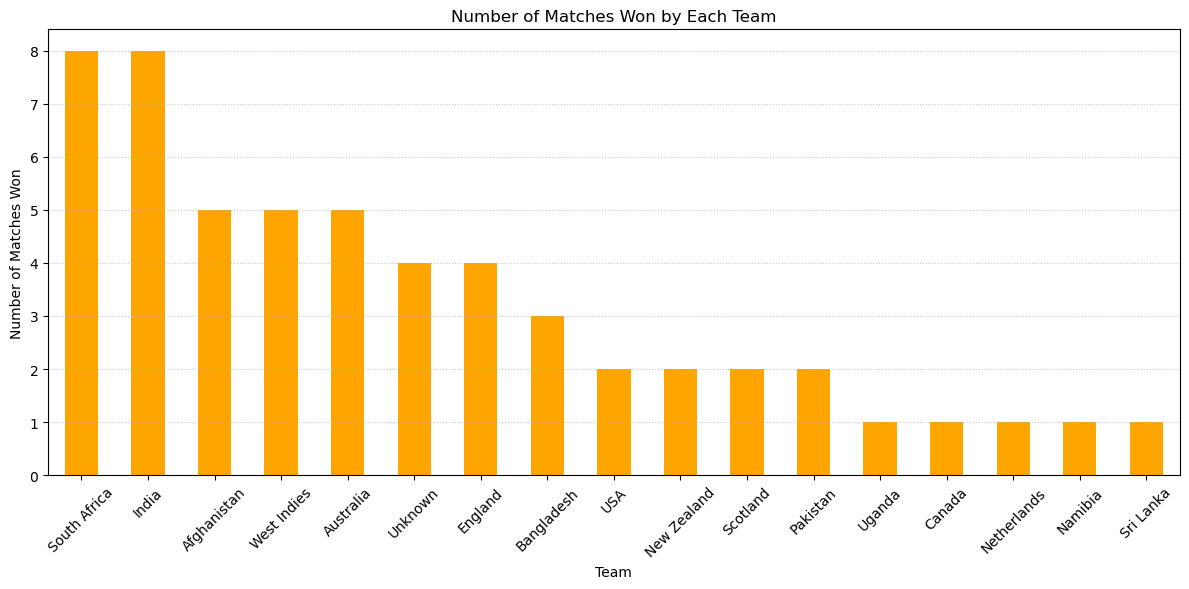

In [81]:
team_wins = df['Winning_team'].value_counts()

plt.figure(figsize=(12, 6))
team_wins.plot(kind='bar', color='orange')
plt.xlabel('Team')
plt.ylabel('Number of Matches Won')
plt.title('Number of Matches Won by Each Team')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

### 2. Win Methods for Top Teams

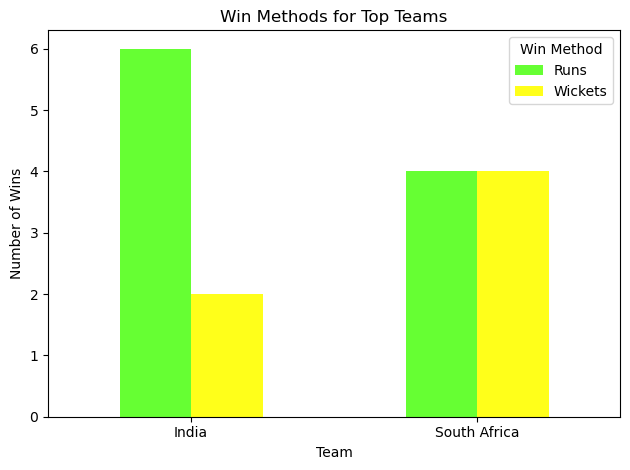

In [82]:
# Calculate number of wins for each team
team_wins = df['Winning_team'].value_counts()

# Find top teams with maximum wins
max_wins = team_wins.max()
top_teams = team_wins[team_wins == max_wins].index.tolist()

# Separate their wins by method (runs or wickets)
top_teams_wins = df[df['Winning_team'].isin(top_teams)]
win_by_method = top_teams_wins.groupby(['Winning_team', 'Win_method']).size().unstack(fill_value=0)

# Define custom light colors
colors = ['#66ff33', '#ffff1a']  # Green and Orange

# Plotting the results for each team using grouped bar chart with custom colors
win_by_method.plot(kind='bar', stacked=False, color=colors)
plt.title('Win Methods for Top Teams')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.legend(title='Win Method', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 3. Teams that Have Not Lost a Single Match

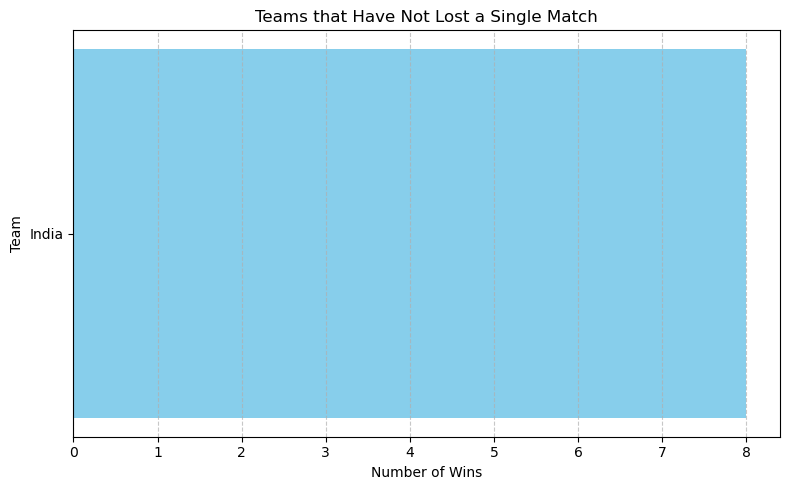

In [83]:
# Filter data to include only played matches for visualization
played_matches_df = df[df['Match_result'] == 'Played']

# Group by Winning Team and count wins
team_wins = played_matches_df['Winning_team'].value_counts()

# Calculate total matches played by each team
team_matches_played = pd.concat([played_matches_df['Team_1'].value_counts(), played_matches_df['Team_2'].value_counts()], axis=1).sum(axis=1)

# Ensure both Series have the same index labels
team_wins = team_wins.reindex(team_matches_played.index)

# Identify teams that have not lost any match
teams_not_lost = team_wins[team_wins == team_matches_played].index.tolist()

# Plotting the teams that have not lost any match using horizontal bar chart
plt.figure(figsize=(8, 5))
plt.barh(teams_not_lost, team_wins[teams_not_lost], color='skyblue')
plt.title('Teams that Have Not Lost a Single Match')
plt.xlabel('Number of Wins')
plt.ylabel('Team')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 4. Impact of Toss Decision on Match Outcomes

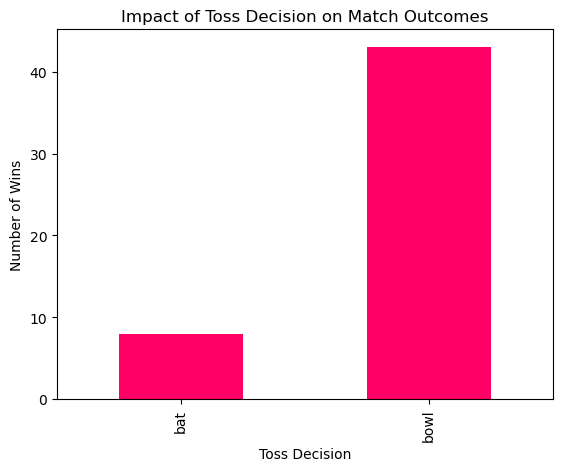

In [84]:
# Group the data by Toss Decision and Winning Team
toss_vs_win = df[df['Match_result'] == 'Played'].groupby(['Toss_decision', 'Winning_team']).size().unstack(fill_value=0)

# Summarize the results by toss decision
toss_win_summary = toss_vs_win.sum(axis=1)

# Visualize the data
toss_win_summary.plot(kind='bar', color='#ff0066')  # Light Orange color
plt.title('Impact of Toss Decision on Match Outcomes')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Wins')
plt.show()

### 5. Impact of Winning the Toss on Match Outcome

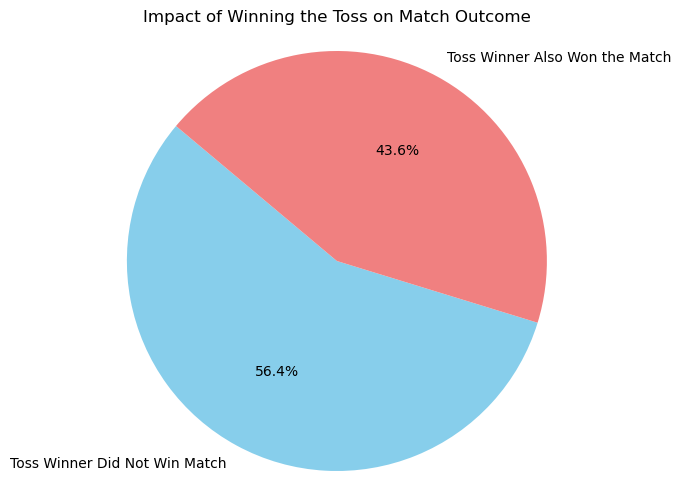

In [85]:
# Calculate the impact of winning the toss on match outcome
df['Toss_win_and_match_win'] = df['Toss_winner'] == df['Winning_team']
toss_win_vs_match_win = df['Toss_win_and_match_win'].value_counts()

# Plotting the pie chart for toss win impact on match outcome
plt.figure(figsize=(8, 6))
colors = ['skyblue', 'lightcoral']
labels = ['Toss Winner Did Not Win Match', 'Toss Winner Also Won the Match']
plt.pie(toss_win_vs_match_win, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Impact of Winning the Toss on Match Outcome')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### 6. Match Outcome Over Time

<Figure size 1200x600 with 0 Axes>

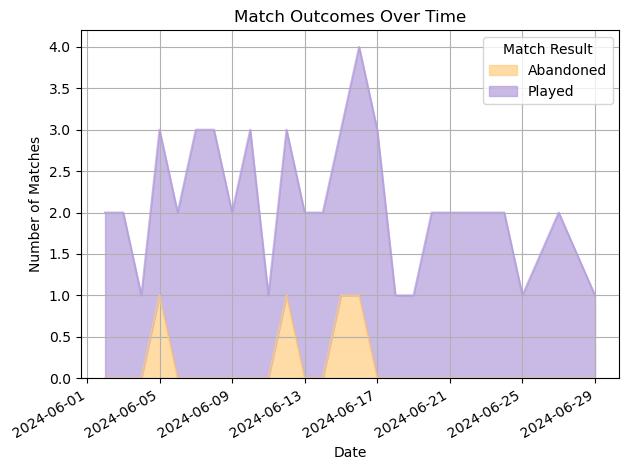

In [86]:
# Group by date and count the match outcomes
matches_over_time = df.groupby(['Date_of_match', 'Match_result']).size().unstack(fill_value=0)

# Plotting the stacked area plot with custom light colors for match outcomes over time
plt.figure(figsize=(12, 6))
colors = ['#FFCC80', '#B39DDB']  # Custom light colors (Light Orange and Light Purple)
matches_over_time.plot(kind='area', stacked=True, alpha=0.7, color=colors)
plt.title('Match Outcomes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Matches')
plt.legend(title='Match Result')
plt.grid(True)
plt.tight_layout()
plt.show()

### 7. Winning Margins by Runs and Wickets

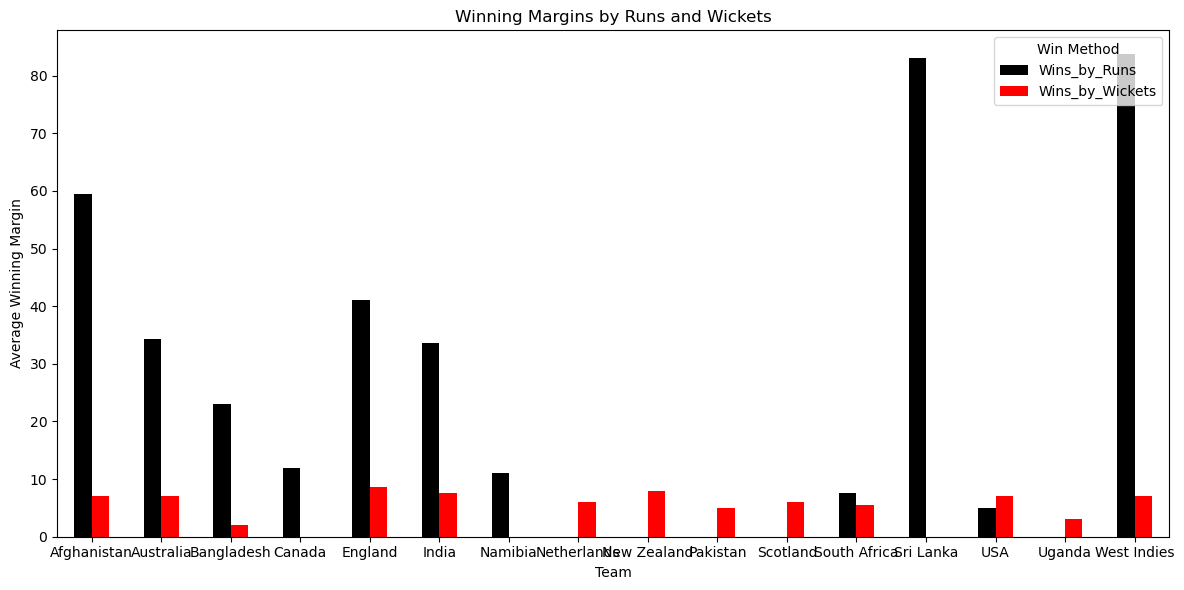

In [87]:
# Separate data for wins by runs and wins by wickets
wins_by_runs = df[df['Win_method'] == 'Runs'].groupby('Winning_team')['Win_result'].mean()
wins_by_wickets = df[df['Win_method'] == 'Wickets'].groupby('Winning_team')['Win_result'].mean()

# Combine both series into a DataFrame
winning_margins = pd.DataFrame({'Wins_by_Runs': wins_by_runs, 'Wins_by_Wickets': wins_by_wickets}).fillna(0)

# Define colors for bars
colors = ['#000000', '#ff0000']  # Blue and Orange

# Plot the data with custom colors
winning_margins.plot(kind='bar', figsize=(12, 6), color=colors)
plt.title('Winning Margins by Runs and Wickets')
plt.xlabel('Team')
plt.ylabel('Average Winning Margin')
plt.legend(title='Win Method', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 8. Venue Performance Analysis

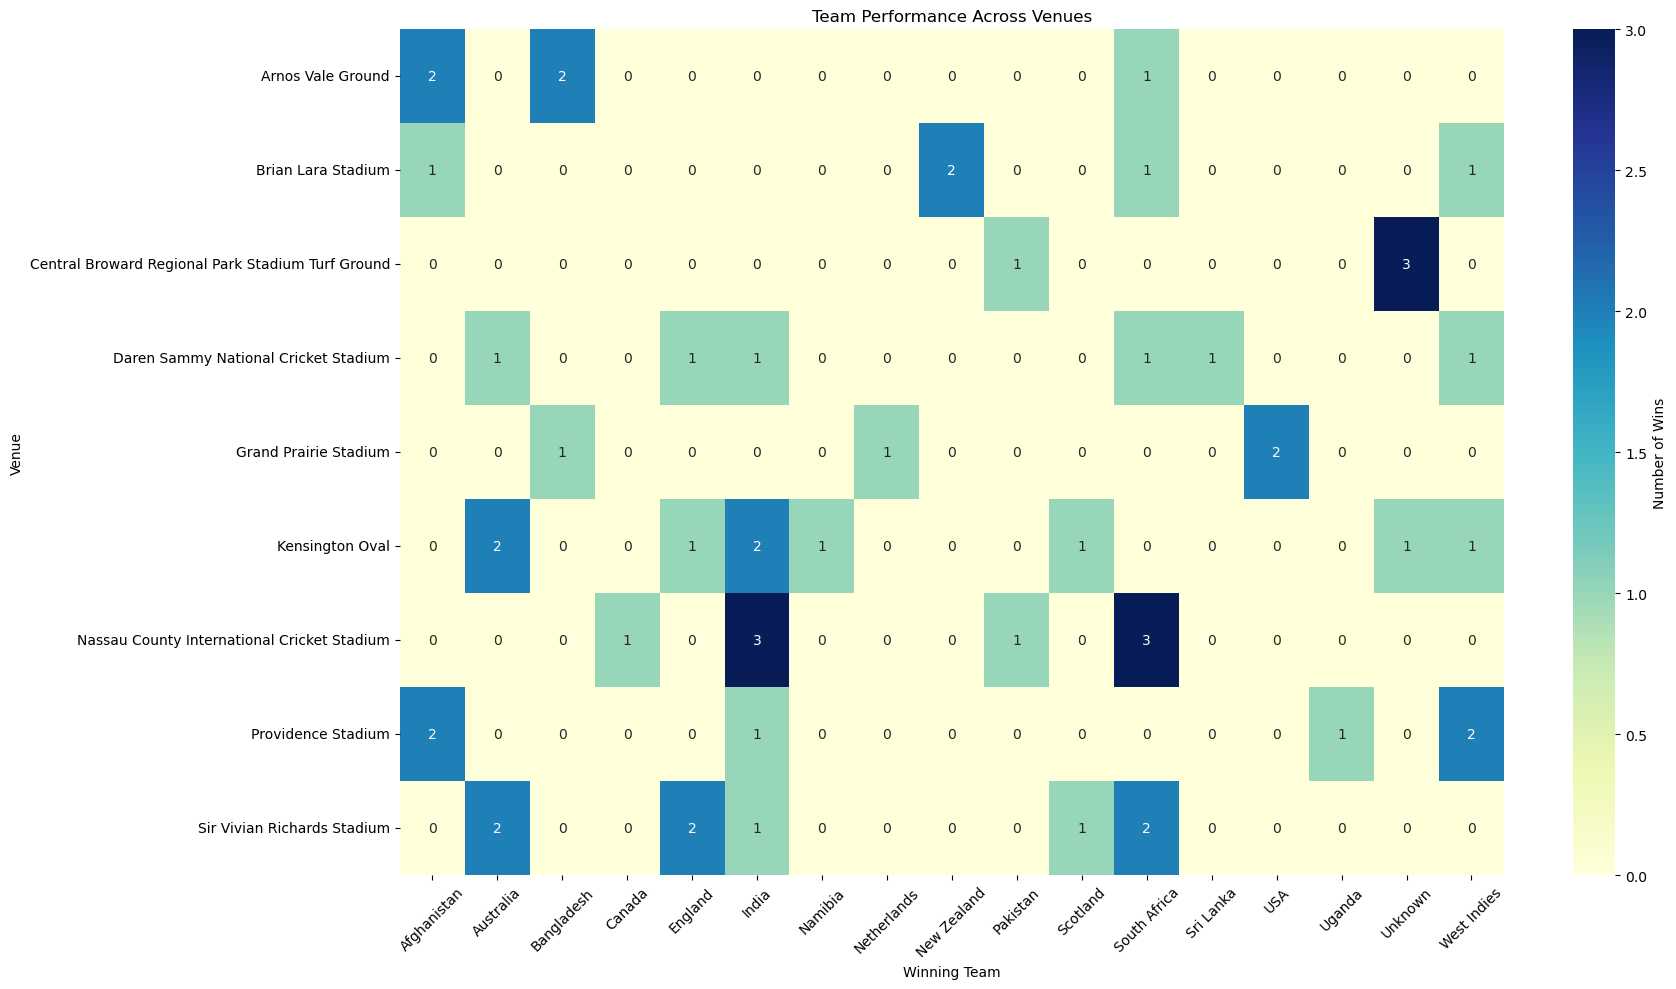

In [88]:
# Group by Venue and Winning Team
venue_performance = df.groupby(['Venue_stadium', 'Winning_team']).size().unstack(fill_value=0)

# Plotting the data using a heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(venue_performance, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Number of Wins'})
plt.title('Team Performance Across Venues')
plt.xlabel('Winning Team')
plt.ylabel('Venue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 9. Number of times each player has won Man of the Match

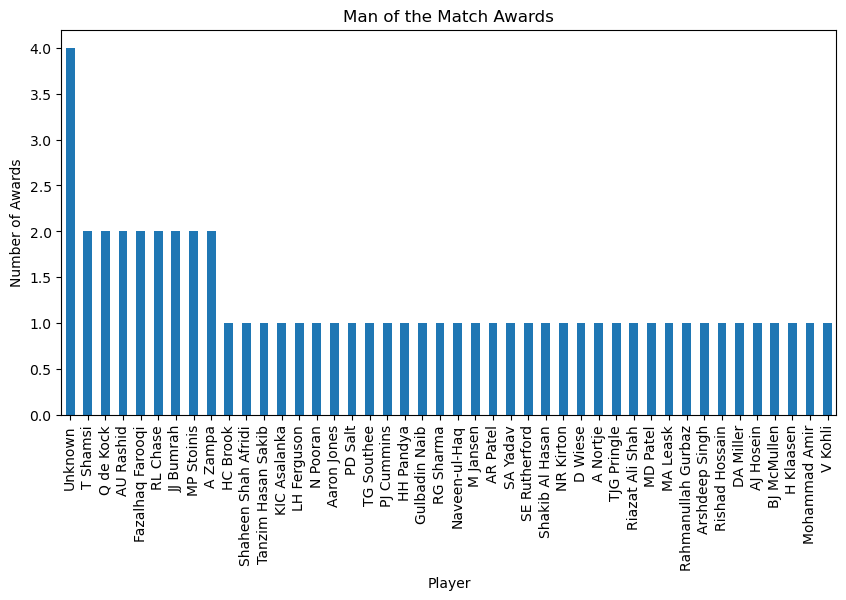

In [89]:
mom_performance = df['Man_of_match'].value_counts()

# Plot the data
mom_performance.plot(kind='bar', figsize=(10, 5))
plt.title('Man of the Match Awards')
plt.xlabel('Player')
plt.ylabel('Number of Awards')
plt.show()

### 10. Team Performance Across Venues

<Figure size 1600x800 with 0 Axes>

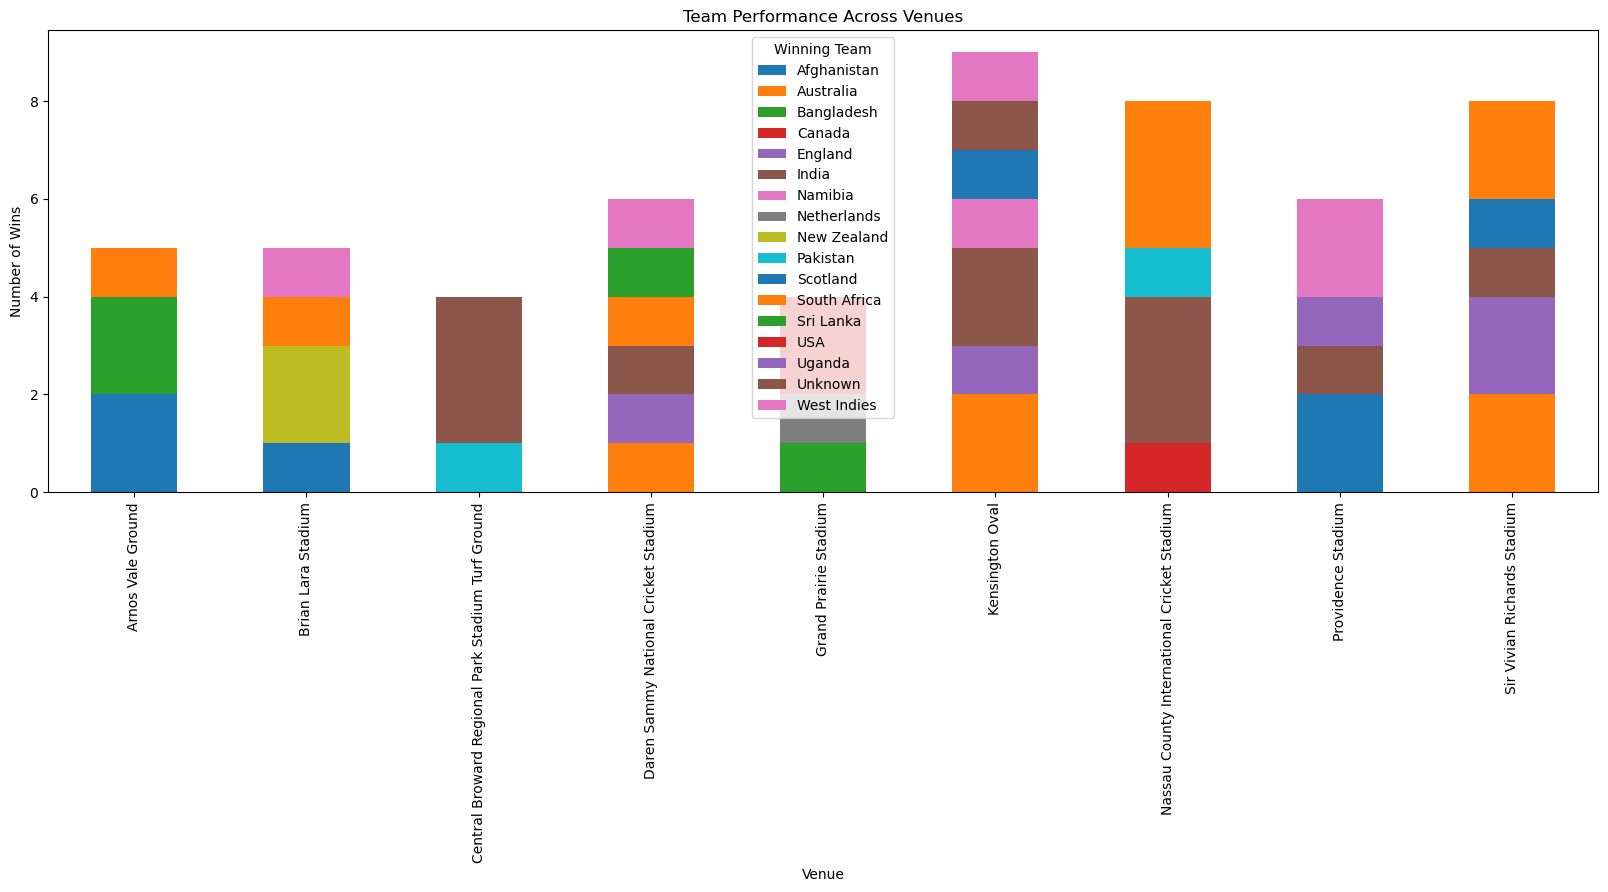

In [90]:
# Group by Venue and Winning Team
venue_performance = df.groupby(['Venue_stadium', 'Winning_team']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(16, 8))
venue_performance.plot(kind='bar', stacked=True, figsize=(20, 6))
plt.title('Team Performance Across Venues')
plt.xlabel('Venue')
plt.ylabel('Number of Wins')
plt.legend(title='Winning Team')
plt.show()